> # Enough to be Dangeous: Simple Linear Regression

This is the 1st notebook of my "Enough to be Dangeous" notebook series

See the other notebooks here:

[Multiple Linear Regression](https://www.kaggle.com/thaddeussegura/enough-to-be-dangerous-multiple-linear-regression)

[Polynomial Regression](https://www.kaggle.com/thaddeussegura/enough-to-be-dangerous-polynomial-regression)


This notebook is separated into two parts:

1) Conceptual Overview:  I will introduce the topic in 200 words or less.

2) Implementation:  I will implement the algorithm in as few lines as possible. 



### Conceptual Overview

Linear Regression is **“supervised”  “regression”** algorithm.


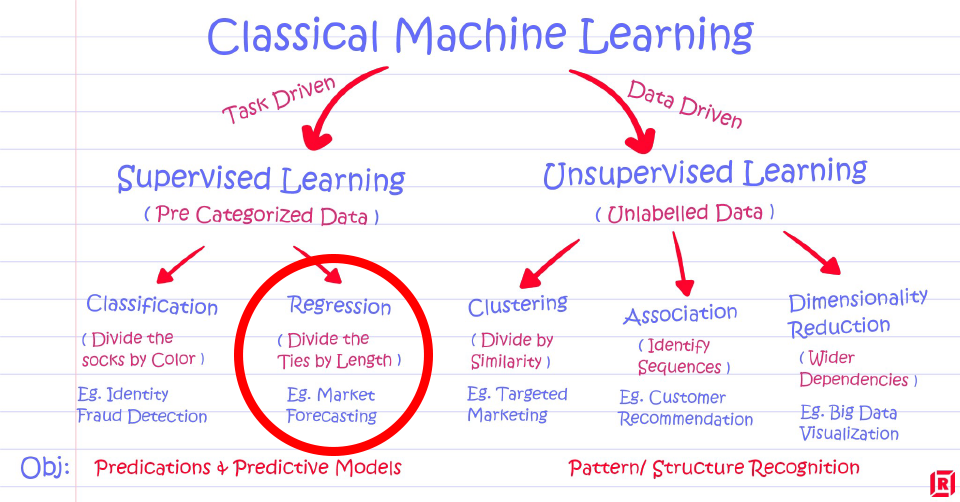

Supervised meaning we use labeled data to train the model.

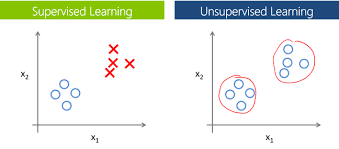

Regression meaning we predict a numerical value, instead of a “class”.

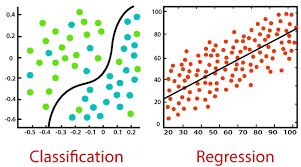

Implementing this algorithm, we fit a line using **“least squares”**, where we try to minimize the squared distances between the data-points and our line.

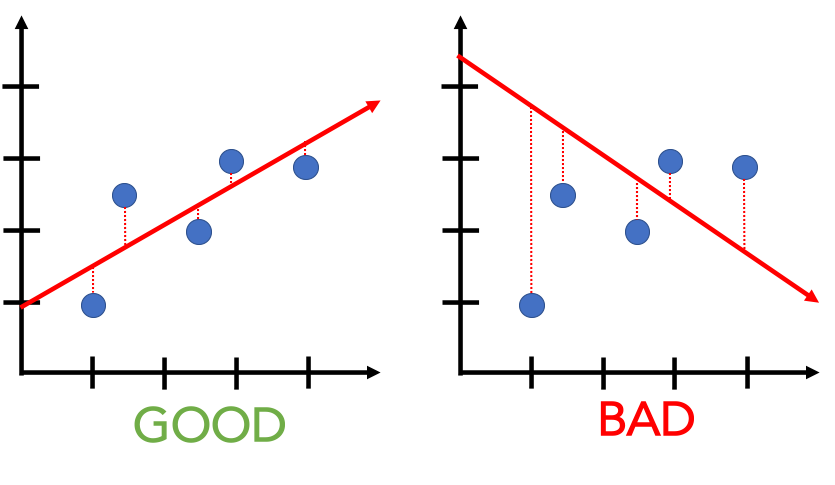

In its simplest form, we start by drawing any line through our data.

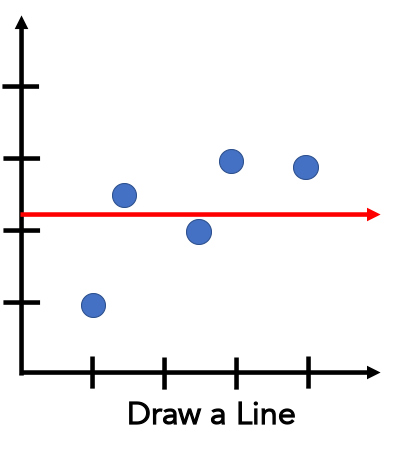

We measure the distances between the points and the line, square them, then sum them.  We’ll call this our “loss”.

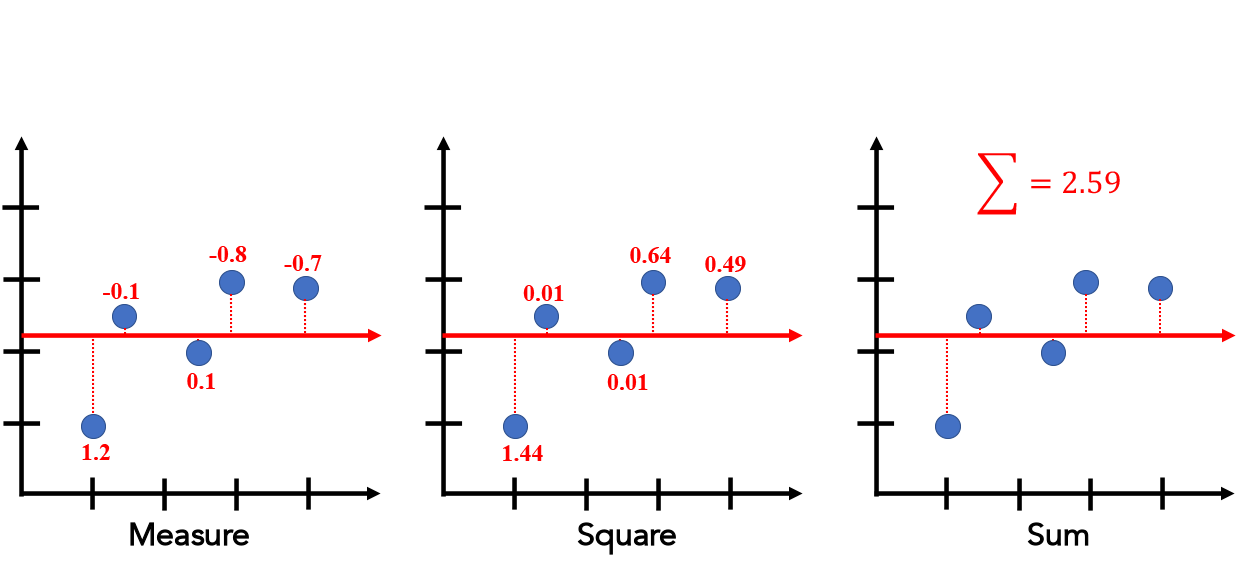

Next, we rotate the line and calculate the loss. 

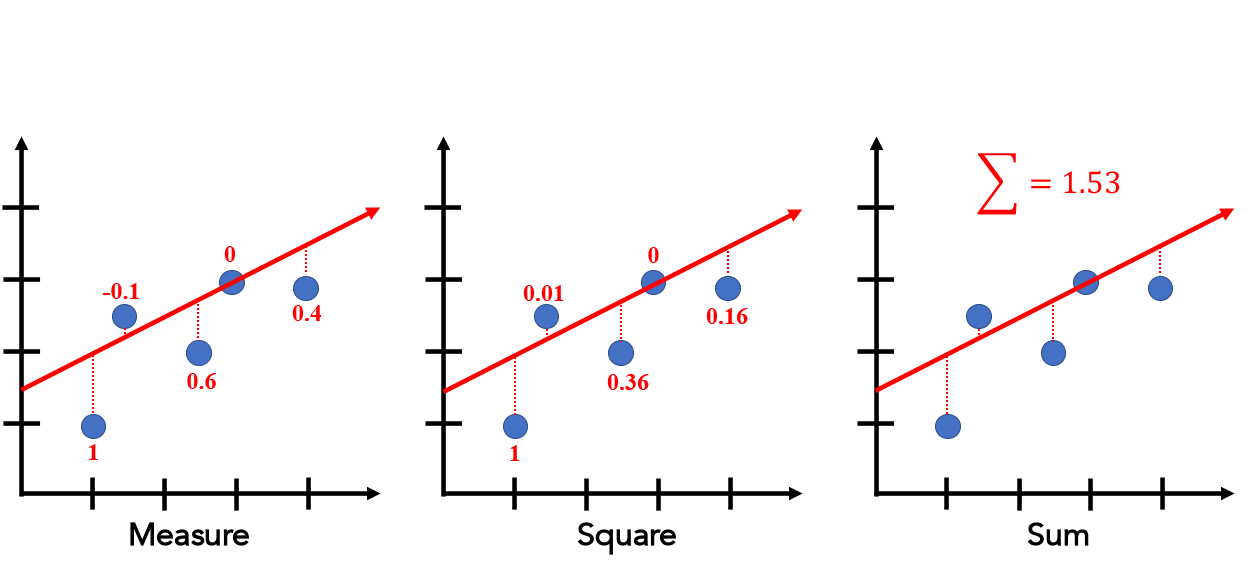

Repeating this step, we see how the loss changes based on the rotation.

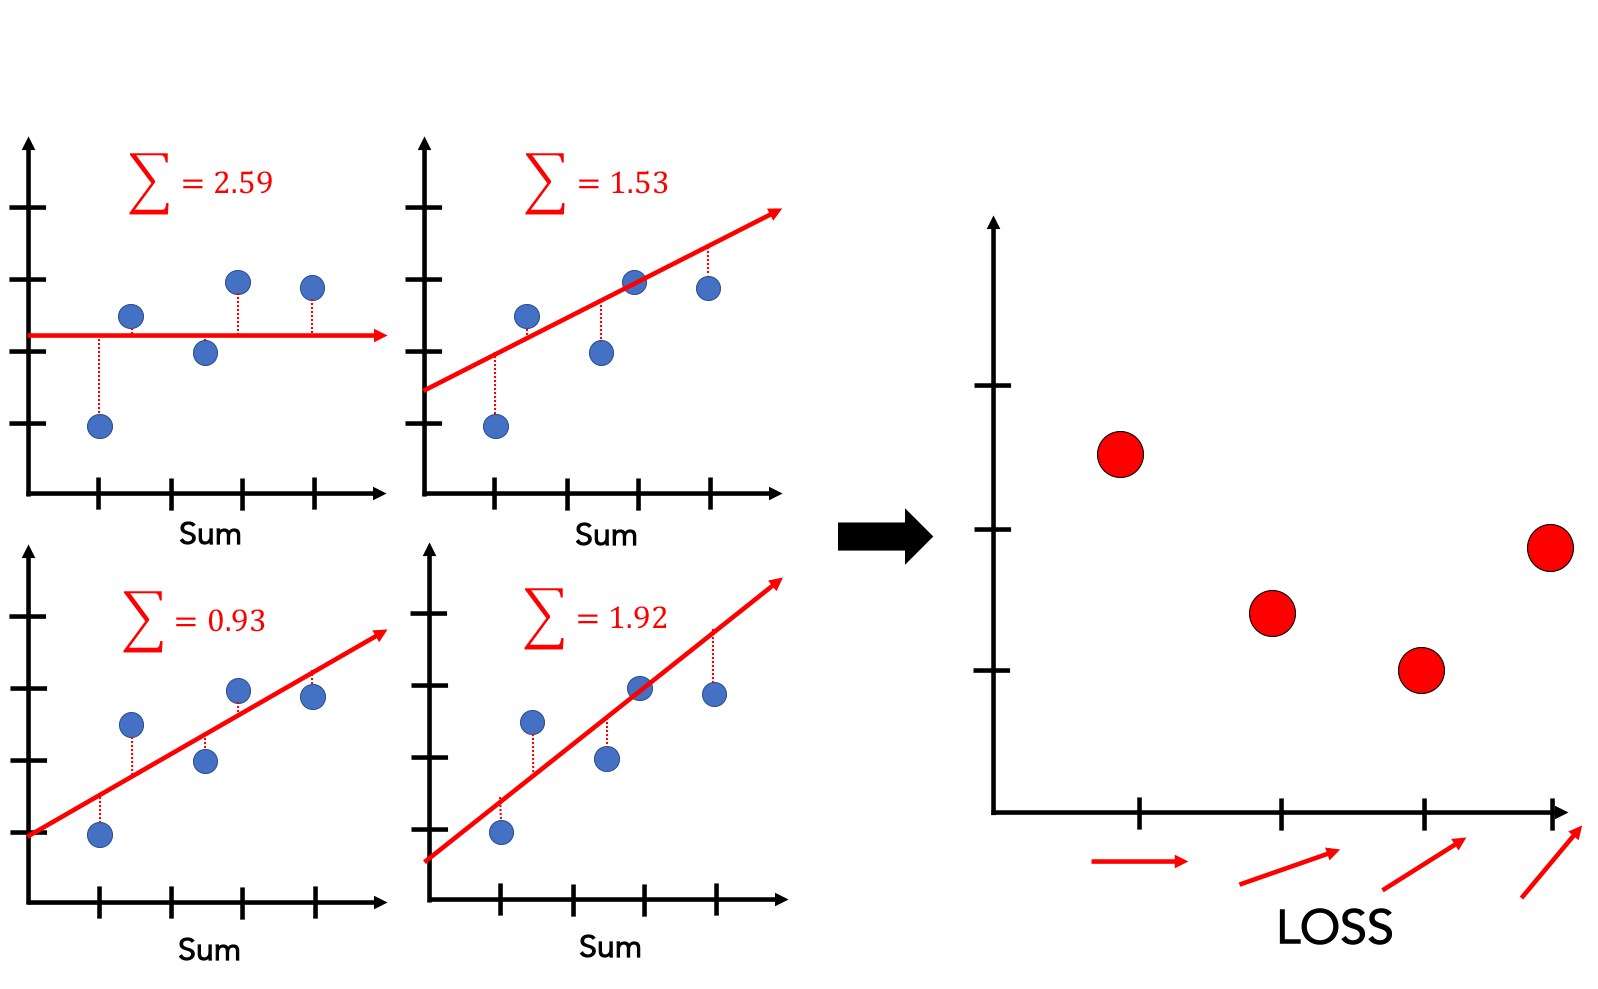

We want the point at which the loss is minimized, which we find by taking the “derivative” of our “loss function”.  Simply, this tells us the slope at any given point, so we calculate the value where the slope = 0.

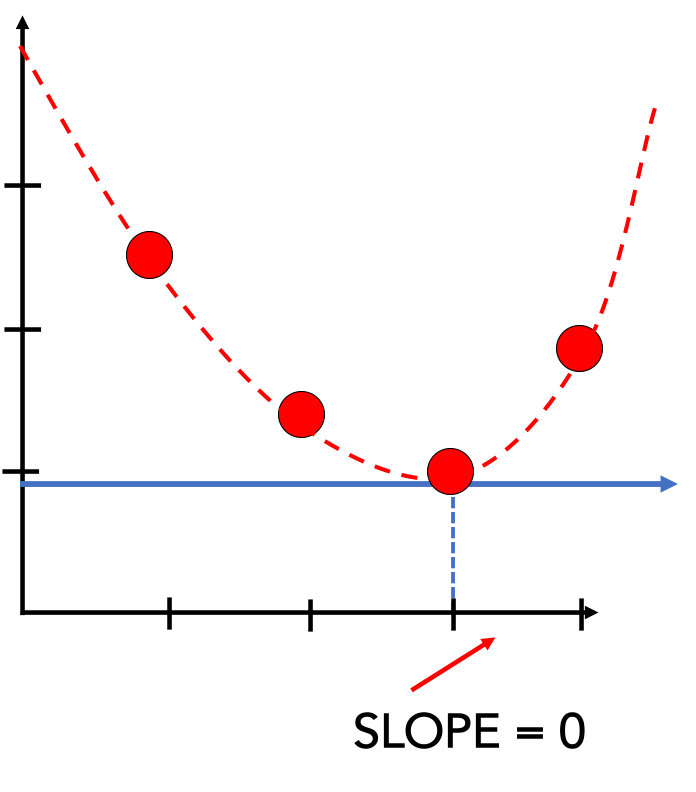

We do this for both the “slope” and the “intercept”, which ultimately gives us our best fitting line.

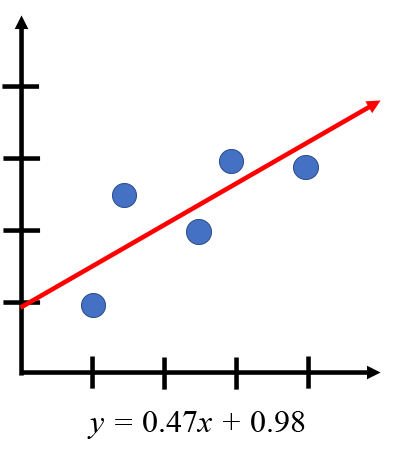

Using the formula for our line, we can predict the output values for any input.

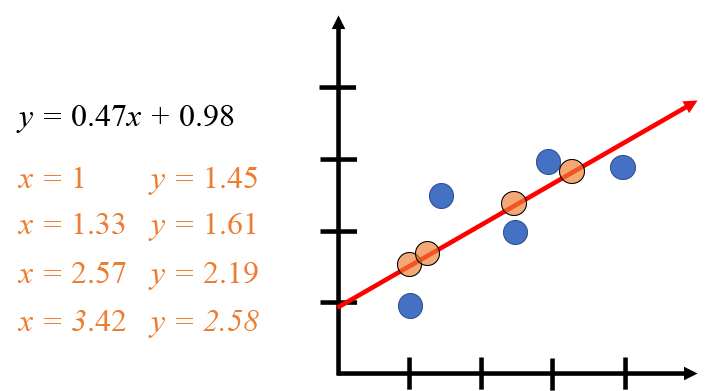

Overall, Linear Regression fast, intuitive, and a great starting point for simple regression problems, but its application is limited to 2-dimensional datasets.

### Implementation

In this problem, we will look at the relationship between work experience and Salary.  This is a regression problem because we are hoping to be able to forecast the salary based on number of years of experience.  

The first step is to start with **"imports"**.  These are **"libraries"** of pre-written code that will help us significantly.

In [1]:
#Numpy is used so that we can deal with array's, which are necessary for any linear algebra
# that takes place "under-the-hood" for any of these algorithms.

import numpy as np


#Pandas is used so that we can create dataframes, which is particularly useful when
# reading or writing from a CSV.

import pandas as pd


#Matplotlib is used to generate graphs in just a few lines of code.

import matplotlib.pyplot as plt


#Sklearn is a very common library that allows you to implement most basic ML algorithms.
#Train_test_split will allow us to quickly split our dataset into a training set and a test set.

from sklearn.model_selection import train_test_split


#LinearRegression is the class of the algorithm we will be using.

from sklearn.linear_model import LinearRegression


#This will allow us to evaluate our fit using the R^2 score. 

from sklearn.metrics import r2_score


With our imports complete, we now read in the data using Pandas.

We will set a independent variable (X) and a dependent variable (y).

In [2]:
#read dataset from csv
dataset = pd.read_csv('/kaggle/input/sample-salary-data/Salary_Data.csv')

#set independent variable using all rows, and all columns except for the last one.
X = dataset.iloc[:, :-1].values

#set the dependent variable using all rows, but ony the last column.
y = dataset.iloc[:, 1].values

#Lets look at our data 
dataset

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


With our data loaded, we now need to split the data into training and test sets.

In [3]:
#This will create x and y variables for training and test sets.
#Here we are using 25% of our examples for the test set.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

Now, its time to load the model.

In [4]:
#this sets the object regressor to the class of LinearRegression from the Sklearn library.
regressor = LinearRegression()

#this fits the model to our training data.
regressor.fit(X_train, y_train)

LinearRegression()

With our model built, we can now use it for generating predictions.

We will use our test set so we can see how well it did.

In [5]:
#Predict on our test set.
y_pred = regressor.predict(X_test)

Finally, we will visualize the results.  

I will build a function to reduce the amount of code needed, since we will use it twice.

In [6]:
#here is the function, we simply pass in the x and y we want to plot.

def plot_results(x,y):
    plt.scatter(x, y, color = 'red')
    plt.plot(x, regressor.predict(x), color = 'blue')
    plt.title('Salary vs Experience')
    plt.xlabel('Years of Experience')
    plt.ylabel('Salary')
    plt.show()
    

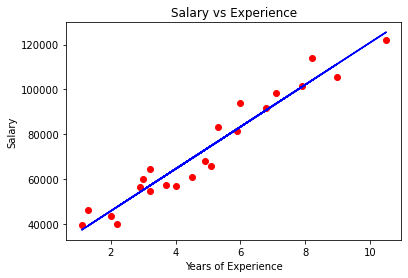

In [7]:
#Visualize the training set

plot_results(X_train, y_train)

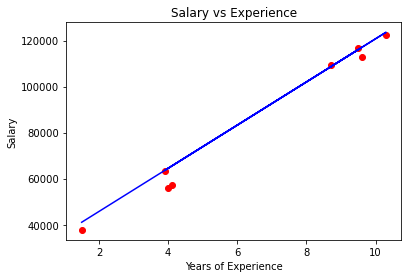

In [8]:
#Visualize the test set

plot_results(X_test, y_test)

Finally, we will calculate the R^2 score, which tells us how much of the variation in our dependent variable can be explained by our independent variable. 

In [9]:
#calculate the R^2 score
score = r2_score(y_test, y_pred)

#print out our score properly formatted as a percent.
print("R^2 score:", "{:.0%}".format(score))


R^2 score: 98%


We had an R^2 of 0.98, meaning that 98% of the variation in salary can be explained by changes in years of experience. 


In [ ]:
x = 10
print(f"hi {x}")